#Install Packages


In [ ]:
pip install scikit-plot

In [ ]:
!pip install -q kaggle

In [ ]:
!mkdir -p ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d shivamb/real-or-fake-fake-jobposting-prediction

 31% 5.00M/16.1M [00:00<00:00, 33.1MB/s]
100% 16.1M/16.1M [00:00<00:00, 84.4MB/s]


In [ ]:
!unzip /content/real-or-fake-fake-jobposting-prediction.zip

Archive:  /content/real-or-fake-fake-jobposting-prediction.zip
  inflating: fake_job_postings.csv   


#Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet
import keras
from keras.layers import Dense
from keras.models import Sequential

In [ ]:
df = pd.read_csv('fake_job_postings.csv')

In [ ]:
df.head(5)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [ ]:
df.drop(labels=['job_id','salary_range'],axis=1,inplace=True)

In [ ]:
df.shape

(17880, 16)

In [ ]:
df.fillna(" ",inplace = True)

In [ ]:
df.isnull().sum()

title                  0
location               0
department             0
company_profile        0
description            0
requirements           0
benefits               0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64

In [ ]:
df['text'] = df['title']+ ' ' + df['location'] + ' ' + df['department'] + ' '+ df['company_profile']+' '+df['description']+' '+df['requirements']+' '+df['benefits']+' '+df['employment_type'] + ' ' + df['required_experience'] + ' '+df['required_education'] +' '+ df['industry'] + ' '+df['function']

In [ ]:
df.head(2)

,title,location,department,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,text
0,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,0,1,0,Other,Internship,,,Marketing,0,"Marketing Intern US, NY, New York Marketing We..."
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,,Marketing and Advertising,Customer Service,0,"Customer Service - Cloud Video Production NZ, ..."


##Data Cleaning

In [ ]:
pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall

  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to /tmp/pip-req-build-yhe4mqdv
  Running command git clone --filter=blob:none --quiet https://github.com/laxmimerit/preprocess_kgptalkie.git /tmp/pip-req-build-yhe4mqdv
  Resolved https://github.com/laxmimerit/preprocess_kgptalkie.git to commit 96bf02872d9756f29d6cddb8aafaedcd2a39bbb4
  Preparing metadata (setup.py) ... done
  Created wheel for preprocess-kgptalkie: filename=preprocess_kgptalkie-0.1.3-py3-none-any.whl size=7603 sha256=987423c6a98d2f5b85b2e45eed53aea5b6e00a2b2a2ef8c04319630633af5a4a
  Stored in directory: /tmp/pip-ephem-wheel-cache-8bvafmcv/wheels/5c/94/34/99d5ff65e88b8d9a6c5e8d8652f2311d87790a61a1b7466e21
Successfully built preprocess-kgptalkie


In [ ]:
import preprocess_kgptalkie as ps

In [ ]:
def get_clean(x):
    x = str(x).lower().replace('\\', '').replace('_', ' ')
    x = ps.cont_exp(x)
    x = ps.remove_emails(x)
    x = ps.remove_urls(x)
    x = ps.remove_html_tags(x)
    x = ps.remove_rt(x)
    x = ps.remove_accented_chars(x)
    x = ps.remove_special_chars(x)

    return x

In [ ]:
df['text']=df['text'].apply(lambda x: get_clean(x))

/usr/local/lib/python3.10/dist-packages/preprocess_kgptalkie/utils.py:97: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  return BeautifulSoup(x, 'lxml').get_text().strip()


##Text Tokenization


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
text=df['text'].tolist()
text

['marketing intern us ny new york marketing were food52 and weve created a groundbreaking and awardwinning cooking site we support connect and celebrate home cooks and give them everything they need in one placewe have a top editorial business and engineering team were focused on using technology to find new and better ways to connect people around their specific food interests and to offer them superb highly curated information about food and cooking we attract the most talented home cooks and contributors in the country we also publish wellknown professionals like mario batali gwyneth paltrow and danny meyer and we have partnerships with whole foods market and random housefood52 has been named the best food website by the james beard foundation and iacp and has been featured in the new york times npr pando daily techcrunch and on the today showwere located in chelsea in new york city food52 a fastgrowing james beard awardwinning online food community and crowdsourced and curated reci

In [ ]:
text[:2]

['marketing intern us ny new york marketing were food52 and weve created a groundbreaking and awardwinning cooking site we support connect and celebrate home cooks and give them everything they need in one placewe have a top editorial business and engineering team were focused on using technology to find new and better ways to connect people around their specific food interests and to offer them superb highly curated information about food and cooking we attract the most talented home cooks and contributors in the country we also publish wellknown professionals like mario batali gwyneth paltrow and danny meyer and we have partnerships with whole foods market and random housefood52 has been named the best food website by the james beard foundation and iacp and has been featured in the new york times npr pando daily techcrunch and on the today showwere located in chelsea in new york city food52 a fastgrowing james beard awardwinning online food community and crowdsourced and curated reci

In [ ]:
token=Tokenizer()
token.fit_on_texts(text)

In [ ]:
token.word_counts

OrderedDict([('marketing', 14297),
             ('intern', 645),
             ('us', 22020),
             ('ny', 1656),
             ('new', 19015),
             ('york', 2681),
             ('were', 8282),
             ('food52', 147),
             ('and', 369236),
             ('weve', 1439),
             ('created', 1005),
             ('a', 143367),
             ('groundbreaking', 165),
             ('awardwinning', 388),
             ('cooking', 229),
             ('site', 2425),
             ('we', 59189),
             ('support', 10013),
             ('connect', 646),
             ('celebrate', 115),
             ('home', 4233),
             ('cooks', 150),
             ('give', 1494),
             ('them', 5570),
             ('everything', 1164),
             ('they', 5966),
             ('need', 5203),
             ('in', 126692),
             ('one', 7975),
             ('placewe', 44),
             ('have', 28065),
             ('top', 3013),
             ('editorial', 401)

In [ ]:
len(token.word_counts)

162722

In [ ]:
print(token.index_word)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
vocab_size=len(token.word_counts)+1

In [ ]:
encoded_text=token.texts_to_sequences(text)

In [ ]:
print(encoded_text)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
max_length=500
X=pad_sequences(encoded_text,maxlen=max_length, padding='post')

In [ ]:
print(X)

[[   45  1339    27 ...     0     0     0]
 [  571   211   201 ...   310    33    43]
 [ 5422  2860   581 ...     0     0     0]
 ...
 [   84   418   439 ...     0     0     0]
 [ 1268   600 17083 ...     0     0     0]
 [  131     2   234 ...   158    57   103]]


##Model Building


In [ ]:
"""from keras.utils import np_utils"""
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
"""from tensorflow.keras.models import Sequential"""
from keras.layers import LSTM, Dense, Embedding, Dropout,Bidirectional

In [ ]:
y=df['fraudulent']

In [ ]:
type(y)

pandas.core.series.Series

In [ ]:
print(y)

0        0
1        0
2        0
3        0
4        0
        ..
17875    0
17876    0
17877    0
17878    0
17879    0
Name: fraudulent, Length: 17880, dtype: int64


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0,stratify=y)

In [ ]:
X_train.shape,X_test.shape

((14304, 500), (3576, 500))

In [ ]:
vec_size=300
model=Sequential()
model.add(Embedding(vocab_size,vec_size,input_length=max_length))
model.add(Bidirectional(LSTM(units=60,activation='tanh',return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(units=60,activation='tanh')))
model.add(Dropout(0.2))

model.add(Dense(units=1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 300)          48816900  
                                                                 
 bidirectional (Bidirection  (None, 500, 120)          173280    
 al)                                                             
                                                                 
 dropout (Dropout)           (None, 500, 120)          0         
                                                                 
 bidirectional_1 (Bidirecti  (None, 120)               86880     
 onal)                                                           
                                                                 
 dropout_1 (Dropout)         (None, 120)               0         
                                                                 
 dense (Dense)               (None, 1)                 1

In [ ]:
model.fit(X_train,y_train,epochs=2,batch_size=128,validation_data=(X_test,y_test))

Epoch 1/2
112/112 [==============================] - 46s 292ms/step - loss: 0.1523 - accuracy: 0.9583 - val_loss: 0.0699 - val_accuracy: 0.9815
Epoch 2/2
112/112 [==============================] - 28s 247ms/step - loss: 0.0341 - accuracy: 0.9904 - val_loss: 0.0591 - val_accuracy: 0.9796


In [ ]:
y_pred=model.predict(X_test)

112/112 [==============================] - 4s 25ms/step


In [ ]:
from sklearn.metrics import f1_score,accuracy_score,recall_score,roc_auc_score

In [ ]:
y_pred.round(2)

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [ ]:
y_pred=y_pred.flatten()

In [ ]:
print(y_pred.round(2))

[0. 0. 0. ... 0. 0. 0.]


In [ ]:
y_pred=np.where(y_pred>0.5,1,0)

In [ ]:
print(y_pred)

[0 0 0 ... 0 0 0]


In [ ]:
y_test

15150    0
475      0
8920     0
7970     0
16311    0
        ..
3294     0
1701     0
11703    0
1160     0
15971    0
Name: fraudulent, Length: 3576, dtype: int64

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix, roc_auc_score
from mlxtend.plotting import plot_confusion_matrix

In [ ]:
y_pred_labels=[np.argmax(label) for label in y_pred]
print(classification_report(y_test,y_pred))

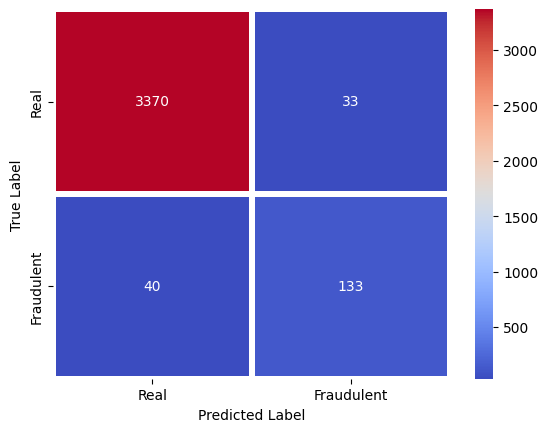

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
cm=confusion_matrix(y_test,y_pred)
ax=sns.heatmap(cm,annot=True,fmt='d',cmap="coolwarm",linewidths=4,xticklabels=['Real','Fraudulent'],yticklabels=['Real','Fraudulent'])
ax.set(xlabel='Predicted Label',
       ylabel="True Label")
plt.show()


In [ ]:
 """predict_prob=model.predict_proba(X_test)"""
 print("AUC ROC")
 print(roc_auc_score(y_test, y_pred))

AUC ROC
0.8795444006393542
